In [1]:
from pvtm.pvtm import PVTM

In [2]:
import pandas as pd
df = pd.read_csv('data/sample_5000.csv', nrows=1500)

In [3]:
import nltk
from nltk.corpus import stopwords 
example_len = 150
stop_words = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03'])

In [4]:
input_= df.text.values
pvtm = PVTM(input_[:example_len], preprocess=True, min_df = 0.05, max_df = 0.5)

0.05 0.5
1140 words in the vocabulary


In [5]:
n_topics=10

pvtm.fit(vector_size=100,dbow_words=1,dm=0,epochs=1,window=5,seed=123,min_count=5,workers=6,alpha=0.025, min_alpha=0.025,
        n_components= n_topics, covariance_type='full', verbose=1, n_init=1, max_iter=200)

Building vocab
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
GMM Clustering
Initialization 0
Initialization converged: True
BIC: 122038.09486071096
Cluster Center Computation
vectors (150, 100)


[None, None, None, None, None, None, None, None, None, None]

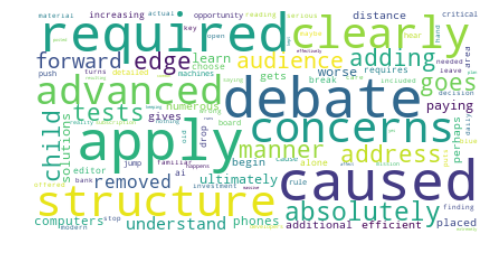

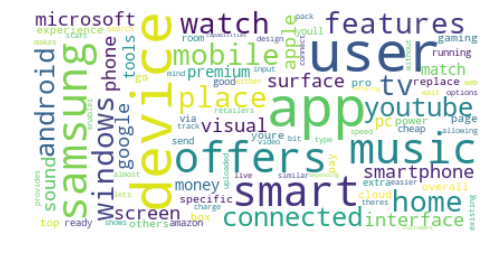

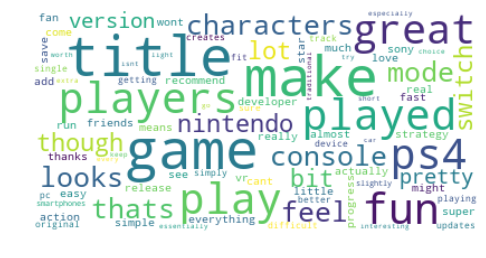

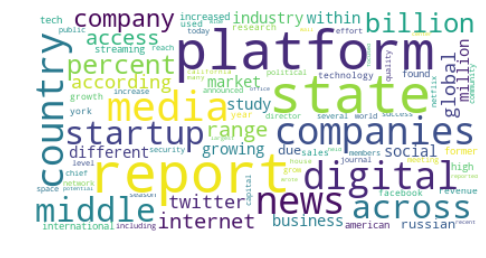

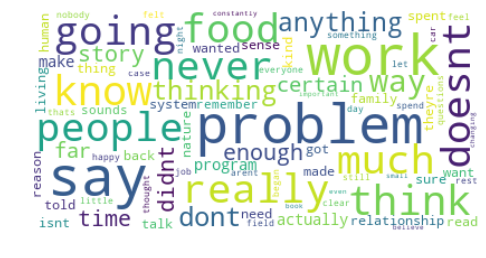

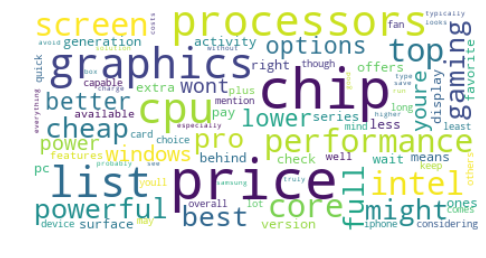

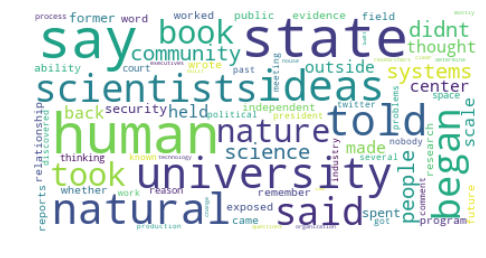

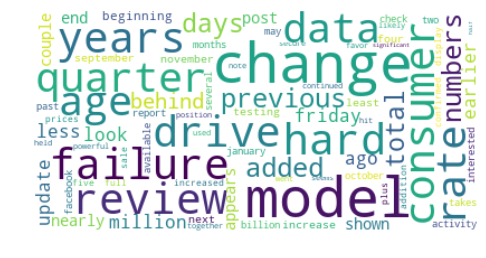

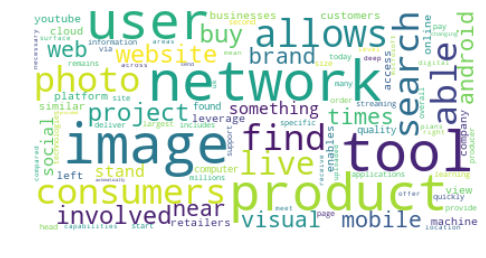

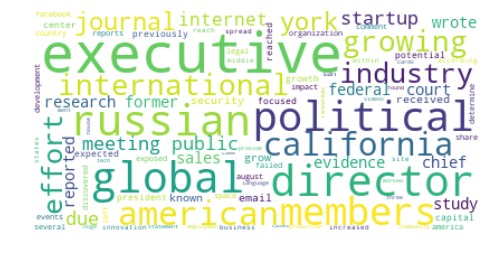

In [6]:
[pvtm.create_wordcloud(i) for i in range(10)]

In [15]:
len(pvtm.document_vectors[0])

100

Infer_vector

In [ ]:
# a larger steps (at least as large as the number of model training iterations, but perhaps even many times larger) is often helpful. 
# Also, a smaller starting alpha, perhaps just the common default for bulk training of 0.025, may give better results. 

In [ ]:
# steps (int, optional, deprecated) – Previous name for epochs, still available for now for backward compatibility: 
   # if epochs is unspecified but steps is, the steps value will be used

In [12]:
ivec = pvtm.get_string_vector(input_[200], steps=20)
len(ivec)

1045

In [34]:
input_[200]

'About TNWTNW SitesEarlier this summer, Razer came into the spotlight following reports hinting the gaming hardware manufacturer is gearing up to make a foray into the smartphone market. But thanks to a leak from a British website 3G, now we have a better idea of what to expect from its upcoming handset.As spotted by Redditors, 3G accidentally lifted the lid on the Razer Phone slightly ahead of its advertised November 1 release date, along with a hefty chunk of the device’s list of specs. The website has already taken the page down, but the internet was swift to screenshot and archive the page for the rest of us to see.As you can observe, the device packs quite a punch. The handset will feature a 5.72-inch IGZO display with 120Hz refresh rate and support for Wide Color Gamut. It will also sport dual front-facing speakers, powered by Dolby’s ATMOS sound system.In addition to this, the Razer Phone will come with 8GB RAM, a 4,000mAh battery and a dual camera setup – a 12MP wide-angle shoo

In [37]:
#to find the vector of a document which is not in training data
from nltk.tokenize import word_tokenize 
test_data = word_tokenize(input_[200].lower())
v1 = pvtm.model.infer_vector(test_data)
len(v1)

100

In [27]:
# to find most similar doc
print(pvtm.model.wv.most_similar(positive=[v1], topn=10))

[('others', 0.9930158853530884), ('type', 0.9907690286636353), ('feature', 0.9869318008422852), ('options', 0.986350417137146), ('page', 0.9862096309661865), ('premium', 0.9862035512924194), ('specific', 0.9859979748725891), ('charge', 0.98565673828125), ('affordable', 0.9853642582893372), ('terms', 0.9852148294448853)]


In [42]:
print(pvtm.model.docvecs.most_similar(positive=[pvtm.document_vectors[1]], topn=10))

[(1, 1.0), (118, 0.9120322465896606), (100, 0.8922252655029297), (37, 0.837083101272583), (29, 0.8328890204429626), (103, 0.8302919864654541), (7, 0.8235868811607361), (30, 0.8198233842849731), (99, 0.77335524559021), (61, 0.7683027982711792)]
